In [5]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Importar el df limpio de Berlin, Germany.
df = pd.read_csv('Berlin_Clean.csv')
df

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,...,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",...,4,250,149,126,13230.0,4.63,4.52,4.92,4.61,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",...,5,193,7,0,0.0,5.00,5.00,4.86,4.86,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",...,0,262,26,0,0.0,4.68,4.85,4.60,4.45,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",...,0,0,48,0,0.0,4.72,4.86,4.67,4.71,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",...,17,111,298,0,0.0,4.77,4.71,4.88,4.65,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",...,90,365,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14183,1446861918532076953,https://www.airbnb.com/rooms/1446861918532076953,2025-06-20,city scrape,Beautiful 1-Bedroom Apartment in Wedding,595670462,https://www.airbnb.com/users/show/595670462,Philipp,2024-08-12,"Berlin, Germany",...,80,355,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14184,1446862242596527946,https://www.airbnb.com/rooms/1446862242596527946,2025-06-20,city scrape,Stunning Studio in Wedding,595670462,https://www.airbnb.com/users/show/595670462,Philipp,2024-08-12,"Berlin, Germany",...,89,364,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14185,1446993798027111825,https://www.airbnb.com/rooms/1446993798027111825,2025-06-20,city scrape,Gemütliches Boot mit Seeblick,569536089,https://www.airbnb.com/users/show/569536089,Tatjana,2024-03-29,"Berlin, Germany",...,79,354,0,0,0.0,0.00,0.00,0.00,0.00,0.00


In [7]:
# Checar Na's
df.isnull().sum()

id                              0
listing_url                     0
last_scraped                    0
source                          0
name                            0
host_id                         0
host_url                        0
host_name                       0
host_since                      0
host_location                   0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_neighbourhood              0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bathrooms_text

In [8]:
# Información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            14187 non-null  int64  
 1   listing_url                   14187 non-null  object 
 2   last_scraped                  14187 non-null  object 
 3   source                        14187 non-null  object 
 4   name                          14187 non-null  object 
 5   host_id                       14187 non-null  int64  
 6   host_url                      14187 non-null  object 
 7   host_name                     14187 non-null  object 
 8   host_since                    14187 non-null  object 
 9   host_location                 14187 non-null  object 
 10  host_response_time            14187 non-null  object 
 11  host_response_rate            14187 non-null  float64
 12  host_acceptance_rate          14187 non-null  float64
 13  h

In [ ]:
# Latitude and Longitude serán excluidos para el rango IQR, debido a que son coordenadas geográficas.
## Primero corregir formato de algunas columnas
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_scraped'] = pd.to_datetime(df['last_scraped'], errors = 'coerce')
df['host_since'] = pd.to_datetime(df['host_since'], errors = 'coerce')

# Corroborar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            14187 non-null  object        
 1   listing_url                   14187 non-null  object        
 2   last_scraped                  14187 non-null  datetime64[ns]
 3   source                        14187 non-null  object        
 4   name                          14187 non-null  object        
 5   host_id                       14187 non-null  object        
 6   host_url                      14187 non-null  object        
 7   host_name                     14187 non-null  object        
 8   host_since                    14174 non-null  datetime64[ns]
 9   host_location                 14187 non-null  object        
 10  host_response_time            14187 non-null  object        
 11  host_response_rate          

In [ ]:
# Separar el df por variables cualitativas y cuantitativas
cuantitativas = df.iloc[:, [11,12,15,16,27,28,30,31] + list(range(33,50))]
cualitativas = df.iloc[:, list(range(0,11)) + [13,14,29,32] + list(range(17,27))]

cuantitativas

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,100.00,80.00,1.0,1.0,2,1.0,1.0,2.0,105.000000,63,...,4,250,149,126,13230.0,4.63,4.52,4.92,4.61,0.76
1,50.00,0.00,1.0,1.0,7,2.5,4.0,4.0,135.000000,6,...,5,193,7,0,0.0,5.00,5.00,4.86,4.86,0.06
2,100.00,25.00,4.0,5.0,1,1.0,0.0,1.0,75.000000,150,...,0,262,26,0,0.0,4.68,4.85,4.60,4.45,0.14
3,100.00,0.00,4.0,4.0,4,1.0,1.0,2.0,173.672536,93,...,0,0,48,0,0.0,4.72,4.86,4.67,4.71,0.26
4,100.00,94.00,2.0,5.0,2,1.0,0.0,1.0,28.000000,92,...,17,111,298,0,0.0,4.77,4.71,4.88,4.65,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,90.00,60.00,2.0,2.0,1,1.0,1.0,1.0,74.000000,1,...,90,365,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14183,100.00,63.00,70.0,70.0,3,1.0,1.0,1.0,68.000000,92,...,80,355,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14184,100.00,63.00,70.0,70.0,2,1.0,1.0,1.0,86.000000,92,...,89,364,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14185,88.88,89.89,1.0,2.0,4,1.0,1.0,2.0,74.000000,1,...,79,354,0,0,0.0,0.00,0.00,0.00,0.00,0.00


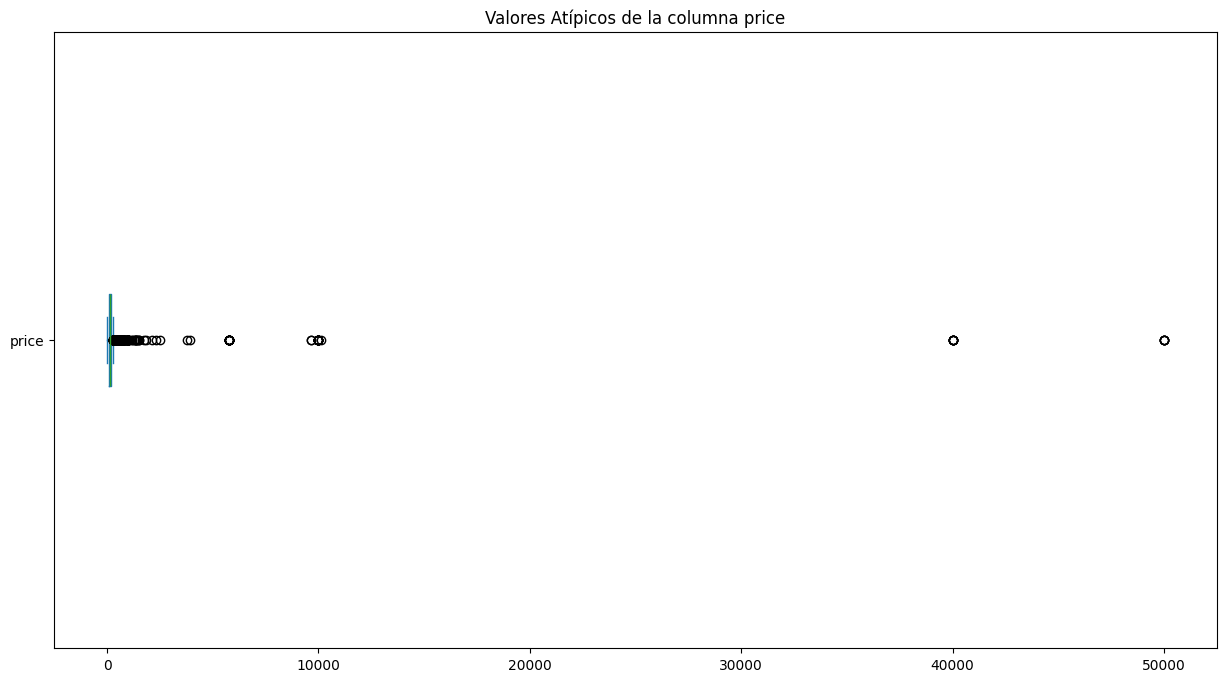

In [26]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas['price'].plot(kind='box', vert=False)
#cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos de la columna price")
plt.show() #dibujamos el diagrama